### Lab 4: Project (Titanic)

 Lab 4 – Predicting a Continuous Target with Regression (Titanic)

 Author: Priyanka Naskar

 Date:4/4/2025

This lab builds on your previous work. We're now shifting from classification (predicting a class like "survived") to regression, where we predict a continuous numeric target.

In this lab, we’ll predict fare, the amount of money paid for the journey, using features in the Titanic dataset.

### Imports

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
 

### Section 1. Import and Inspect the Data

In [2]:
# Load Titanic dataset from seaborn and verify
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Section 2. Data Exploration and Preparation

In [3]:
# Check missing values in fare
missing_count = titanic['fare'].isnull().sum()
print(f"Missing values in fare: {missing_count}")

# Check missing values in embark_town
missing_count_1 = titanic['embark_town'].isnull().sum()
print(f"Missing values in embark_town: {missing_count_1}", "\n")

# Check values in embark_town
print(titanic['embark_town'].unique())

Missing values in fare: 0
Missing values in embark_town: 2 

['Southampton' 'Cherbourg' 'Queenstown' nan]


In [4]:
# Impute median for missing age values
titanic.fillna({'age': titanic['age'].median()}, inplace=True)

# Create numeric variables for family_size
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

# Drop missing values in embark_town
titanic.dropna(subset=['embark_town'], axis=0, inplace=True)

# Convert embark_town to numeric variables
titanic['embark_town'] = titanic['embark_town'].map({'Southampton': 0, 'Cherbourg': 1, 'Queenstown': 2})

# Confirm numeric variables
print(titanic['embark_town'].value_counts())

embark_town
0    644
1    168
2     77
Name: count, dtype: int64


### Section 3. Feature Selection and Justification

#### Case 1.age

In [5]:
# Case 1. age
X1 = titanic[['age']]
y1 = titanic['fare']
print("Case 1 columns:", X1.columns.tolist())


Case 1 columns: ['age']


#### Case 2.family_size only

In [6]:
# Case 2. family_size
X2 = titanic[['family_size']]
y2 = titanic['fare']
print("Case 2 columns:", X2.columns.tolist())

Case 2 columns: ['family_size']


#### Case 3. age and family size

In [7]:
# Case 3. age, family_size
X3 = titanic[['age', 'family_size']]
y3 = titanic['fare']
print("Case 3 columns:", X3.columns.tolist())


Case 3 columns: ['age', 'family_size']


#### Case 4.embark_town

In [8]:
# Case 4. embark_town
X4 = titanic[['embark_town']]
y4 = titanic['fare']
print("Case 4 columns:", X4.columns.tolist())


Case 4 columns: ['embark_town']


eflection Questions - answer these in your notebook (in a Markdown cell):

1. Why might these features affect a passenger’s fare:survived	pclass	sex	age	sibsp	parch	fare	embarked	class	who	adult_male	deck	embark_town	alive	alone
0	0	3	male	22.0	1	0	7.2500	S	Third	man	True	NaN	Southampton	no	False
1	1	1	female	38.0	1	0	71.2833	C	First	woman	False	C	Cherbourg	yes	False
2	1	3	female	26.0	0	0	7.9250	S	Third	woman	False	NaN	Southampton	yes	True
3	1	1	female	35.0	1	0	53.1000	S	First	woman	False	C	Southampton	yes	False
4	0	3	male	35.0	0	0	8.0500	S	Third	man	True	NaN	Southampton	no	True

2. List all available features: 
   
   Survived, pclass, sex, age, sibsp, parch, fare, embarked, class, who, adult_male, deck, embark_town, alive, alone.

3. Which other features could improve predictions and why:  
   
   Pclass - this is a direct indicator of travel class, which is a strong predictor of fare since higher classes typically cost more. Sex - a previous scatterplot in lab02 showed a higher number of female passengers in a higher fare category.

4. How many variables are in your Case 4:  
   1 variable
   
5. Which variable(s) did you choose for Case 4 and why do you feel those could make good inputs: 

 Embark_town - the town may reflect regional pricing strategies or differences in the passenger demographics boarding from various ports. It might identify geographic factors that are potentially a valuable predictor for understanding fare variations.
 

### Section 4. Train a Regression Model (Linear Regression)

##### 4.1 Split the Data

In [9]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=123)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=123)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=123)

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=123)

#### 4.2 Train and Evaluate Linear Regression Models (all 4 cases)

In [10]:
lr_model1 = LinearRegression().fit(X1_train, y1_train)
lr_model2 = LinearRegression().fit(X2_train, y2_train)
lr_model3 = LinearRegression().fit(X3_train, y3_train)
lr_model4 = LinearRegression().fit(X4_train, y4_train)

# Predictions

y_pred_train1 = lr_model1.predict(X1_train)
y_pred_test1 = lr_model1.predict(X1_test)

y_pred_train2 = lr_model2.predict(X2_train)
y_pred_test2 = lr_model2.predict(X2_test)

# TODO: repeat for case 3 and 4 .... 
# Show set sizes - should be the same for all 4
print('Train size:', len(X1_train))
print('Test size:', len(X1_test))

Train size: 711
Test size: 178


#### 4.2 Train and Evaluate Linear Regression Models (all 4 cases)

In [13]:
lr_model1 = LinearRegression().fit(X1_train, y1_train)
lr_model2 = LinearRegression().fit(X2_train, y2_train)
lr_model3 = LinearRegression().fit(X3_train, y3_train)
lr_model4 = LinearRegression().fit(X4_train, y4_train)

# Predictions

y1_pred_train = lr_model1.predict(X1_train)
y1_pred_test = lr_model1.predict(X1_test)

y2_pred_train = lr_model2.predict(X2_train)
y2_pred_test = lr_model2.predict(X2_test)

y3_pred_train = lr_model3.predict(X3_train)
y3_pred_test = lr_model3.predict(X3_test)

y4_pred_train = lr_model4.predict(X4_train)
y4_pred_test = lr_model4.predict(X4_test)

#### 4.3 Report Performance

In [39]:
print("Case 1: Training R²:", r2_score(y1_train, y_pred_train1))
print("Case 1: Test R²:", r2_score(y1_test, y_pred_test1))

test_rmse1 = np.sqrt(mean_squared_error(y1_test, y_pred_test1))
print("Case 1: Test RMSE:", test_rmse1)
print("Case 1: Test MAE:", mean_absolute_error(y1_test, y_pred_test1))

Case 1: Training R²: 0.010665549865473078
Case 1: Test R²: -0.002849705312795381
Case 1: Test RMSE: 43.6496331209602
Case 1: Test MAE: 27.25460517226281


In [38]:
print("Case 2: Training R²:", r2_score(y2_train, y_pred_train2))
print("Case 2: Test R²:", r2_score(y2_test, y_pred_test2))

test_rmse2 = np.sqrt(mean_squared_error(y2_test, y_pred_test2))
print("Case 2: Test RMSE:", test_rmse2)
print("Case 2: Test MAE:", mean_absolute_error(y2_test, y_pred_test2))

Case 2: Training R²: 0.046614184142382054
Case 2: Test R²: 0.05400121408427372
Case 2: Test RMSE: 42.39434811901612
Case 2: Test MAE: 26.105796008939556


In [40]:
print("Case 3: Training R²:", r2_score(y3_train, y_pred_train3))
print("Case 3: Test R²:", r2_score(y3_test, y_pred_test3))

test_rmse3 = np.sqrt(mean_squared_error(y3_test, y_pred_test3))
print("Case 3: Test RMSE:", test_rmse3)
print("Case 3: Test MAE:", mean_absolute_error(y3_test, y_pred_test3))

Case 3: Training R²: 0.07344429171770106
Case 3: Test R²: 0.05423920692432882
Case 3: Test RMSE: 42.3890150329068
Case 3: Test MAE: 25.629772678100053


In [41]:
print("Case 4: Training R²:", r2_score(y4_train, y_pred_train4))
print("Case 4: Test R²:", r2_score(y4_test, y_pred_test4))

test_rmse4 = np.sqrt(mean_squared_error(y4_test, y_pred_test4))
print("Case 4: Test RMSE:", test_rmse4)
print("Case 4: Test MAE:", mean_absolute_error(y4_test, y_pred_test4))

Case 4: Training R²: 0.0015257474060732523
Case 4: Test R²: 0.013763269521885335
Case 4: Test RMSE: 43.28657843999514
Case 4: Test MAE: 26.912236474636334


#### Section 5. Compare Alternative Models

##### 5.1 Ridge Regression (L2 penalty)


In [42]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X4_train, y4_train)
y_pred_ridge = ridge_model.predict(X4_test)

5.2 Elastic Net (L1 + L2 combined)

In [43]:
elastic_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
elastic_model.fit(X4_train, y4_train)
y_pred_elastic = elastic_model.predict(X4_test)

5.3 Polynomial Regression

In [44]:
# Set up the poly inputs
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X1_train)
X_test_poly = poly.transform(X1_test)

In [45]:
# Use the poly inputs in the LR model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y1_train)
y_pred_poly = poly_model.predict(X_test_poly)

5.4 Visualize Polynomial Cubic Fit (for 1 input feature)

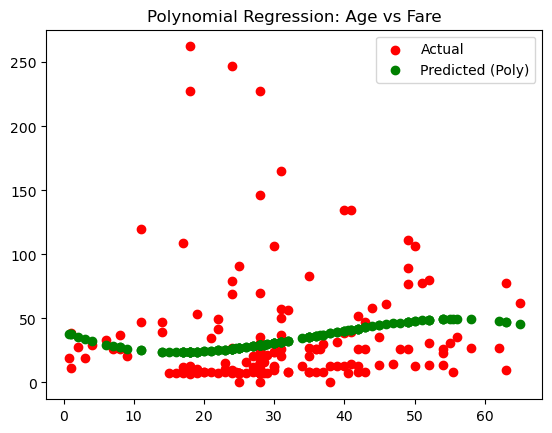

In [56]:
plt.scatter(X1_test, y1_test, color='red', label='Actual')
plt.scatter(X1_test, y_pred_poly, color='green', label='Predicted (Poly)')
plt.legend()
plt.title("Polynomial Regression: Age vs Fare")
plt.show()


5.5 Compare All Models

In [57]:
def report(name, y_true, y_pred):
    print(f"{name} R²: {r2_score(y_true, y_pred):.3f}")
    
    # Calculate RMSE manually
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{name} RMSE: {rmse:.2f}")
    
    # MAE
    print(f"{name} MAE: {mean_absolute_error(y_true, y_pred):.2f}\n")

# Reporting the metrics for each model
report("Linear (Case 4)", y4_test, y_pred_test4)
report("Ridge (Case 4)", y4_test, y_pred_ridge)
report("ElasticNet (Case 4)", y4_test, y_pred_elastic)
report("Polynomial (Case 4)", y4_test, y_pred_poly)

Linear (Case 4) R²: 0.014
Linear (Case 4) RMSE: 43.29
Linear (Case 4) MAE: 26.91

Ridge (Case 4) R²: 0.014
Ridge (Case 4) RMSE: 43.29
Ridge (Case 4) MAE: 26.91

ElasticNet (Case 4) R²: 0.009
ElasticNet (Case 4) RMSE: 43.39
ElasticNet (Case 4) MAE: 26.95

Polynomial (Case 4) R²: -0.013
Polynomial (Case 4) RMSE: 43.86
Polynomial (Case 4) MAE: 26.96



Reflection 5.4-5.5


1. What patterns does the cubic model seem to capture:
   
It captures what looks to be a non-linear trend between age and fare.

2. Where does it perform well or poorly:
   
It performs pretty well in the middle ages, but with children and seniors it seems to struggle.

3. Did the polynomial fit outperform linear regression:
   
No it did not. It had a lower r2 value and a higher RMSE.

4. Where (on the graph or among which kinds of data points) does it fit best:
   
From about age 15-40.

#### 5.5 Visualize Higher Order Polynomial (for the same 1 input case)

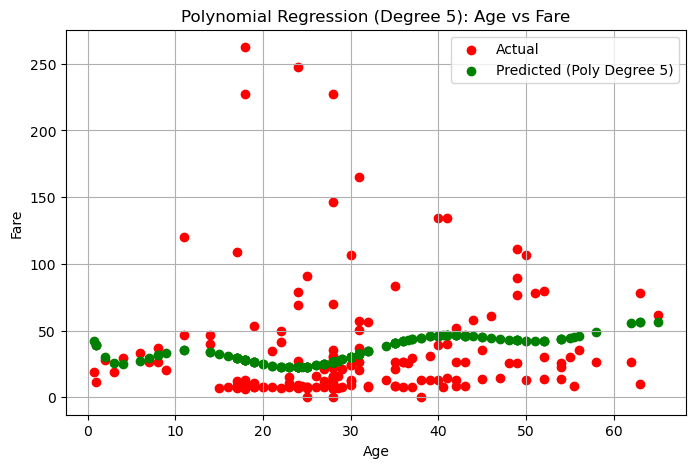

In [63]:
# Higher Degree Polynomial (8)
poly5 = PolynomialFeatures(degree=8)
X1_train_poly5 = poly5.fit_transform(X1_train)
X1_test_poly5 = poly5.transform(X1_test)

poly_model5 = LinearRegression()
poly_model5.fit(X1_train_poly5, y1_train)
y_pred_poly5 = poly_model5.predict(X1_test_poly5)

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X1_test, y1_test, color='red', label='Actual')
plt.scatter(X1_test, y_pred_poly5, color='green', label='Predicted (Poly Degree 5)')
plt.legend()
plt.title("Polynomial Regression (Degree 5): Age vs Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.grid(True)
plt.show()

Reflection 5.5

Which model performed better and why?

The degree 8 model looks to have overfit the noise better than the degree 5 model, although they look very alike.

Why?

When you increase the degree of the polynomial, and with little data, the generalizations become worse.

#### Section 6. Final Thoughts and Insights

6.1 Summarize Findings

What features were most useful? Sex and age were the most useful features in this model but not ideal to predict fare. Sex perfomed the best out of all cases, and age added some improvement in the later cases ran. There are other features that would been a better fit than sex.

What regression model performed best? Linear regression performed the best as it had the highest R2 test score and lower errors even though all cases were underfit.

How did model complexity or regularization affect results? Neither model performed well enough to identity fare. Linear regression (the simpler model) did not perform well but when adding complexity with polynomial regression, it did not perform as well either.

6.2 Discuss Challenges

Was fare hard to predict? Why? Fare was hard to predict since the all models were underfit with low R2 values and high error values based of the features selected. If different features like pclass were used, I believe this model would been better executed.

Did skew or outliers impact the models? I believe that both skew and outlier hurt the performance of the models as there were many low fares and with a few high fares and outliers that made the models underfit from poor performance.

6.3 Optional Next Steps

Try different features besides the ones used (e.g., pclass, sex if you didn't use them this time)

Try predicting age instead of fare

Explore log transformation of fare to reduce skew